In [4]:
import math

In [5]:
import numpy as np
import pandas as pd

In [6]:
import matplotlib
import matplotlib.pyplot as pp

In [7]:
%matplotlib inline

In [8]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

Loading gapminder data for year 1985 (Live Aid!) and setting up plot as in chapter 3

In [9]:
gapminder = pd.read_csv('gapminder.csv')

In [10]:
gdata = gapminder.query('year == 1985')

In [11]:
gdata

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
50,Afghanistan,1985,Asia,11630498.0,45.21,78.400,7.68,1384.0,3.789185
131,Albania,1985,Europe,2966799.0,72.71,94.570,3.23,4267.0,11.682409
212,Algeria,1985,Africa,22565908.0,67.18,92.880,5.98,11030.0,30.198494
293,Angola,1985,Africa,9745209.0,47.50,77.170,7.21,4117.0,11.271732
374,Antigua and Barbuda,1985,America,65744.0,72.13,96.946,2.09,11383.0,31.164956
...,...,...,...,...,...,...,...,...,...
14385,Venezuela,1985,America,17508059.0,70.89,96.390,3.79,13874.0,37.984942
14466,Vietnam,1985,Asia,61049370.0,67.77,93.970,4.21,1345.0,3.682409
14547,Yemen,1985,Asia,9774242.0,55.69,84.730,9.19,3526.0,9.653662
14628,Zambia,1985,Africa,7017292.0,55.54,83.300,6.80,2602.0,7.123888


In [12]:
gdata.population

50       11630498.0
131       2966799.0
212      22565908.0
293       9745209.0
374         65744.0
            ...    
14385    17508059.0
14466    61049370.0
14547     9774242.0
14628     7017292.0
14709     8862601.0
Name: population, Length: 182, dtype: float64

In [13]:
size = 1e-6 * gdata.population
size

50       11.630498
131       2.966799
212      22.565908
293       9.745209
374       0.065744
           ...    
14385    17.508059
14466    61.049370
14547     9.774242
14628     7.017292
14709     8.862601
Name: population, Length: 182, dtype: float64

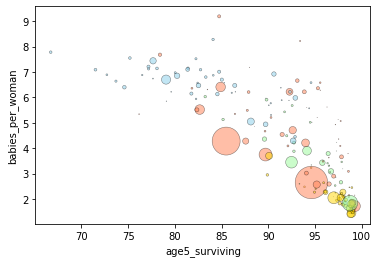

In [46]:
size = 1e-6 * gdata.population

colors = gdata.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral'})

def plotdata():
    gdata.plot.scatter('age5_surviving','babies_per_woman',
                       c=colors,s=size,linewidths=0.5,edgecolor='k',alpha=0.5)


    
plotdata()

In [45]:
colors

50           coral
131           gold
212        skyblue
293        skyblue
374      palegreen
           ...    
14385    palegreen
14466        coral
14547        coral
14628      skyblue
14709      skyblue
Name: region, Length: 182, dtype: object

statsmodels is a package used to fit models. The package uses the tilde formula notation. OLS method is Ordinary least squares is a regression method we can use. 

In [25]:
model = smf.ols(formula='babies_per_woman ~ 1', data=gdata)
grandmean = model.fit()

In [21]:
def plotfit(fit):
    plotdata()
    pp.scatter(gdata.age5_surviving,fit.predict(gdata),c = colors,
              s = 30, linewidth = 0.5, edgecolor='K',marker = 'D')

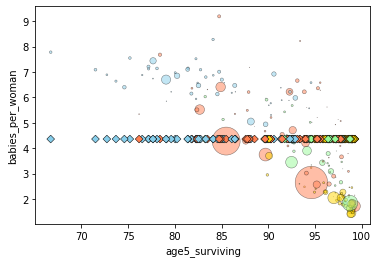

In [68]:
plotfit(grandmean)

In [28]:
grandmean.params

Intercept    4.360714
dtype: float64

By adding in '+region' we have the model equivilant of taking means from each region. the -1 treats all groups in the game way instead of basing it of the top group. 

In [72]:
modelRegionmeans = smf.ols(formula='babies_per_woman ~ -1 + region', data=gdata).fit()

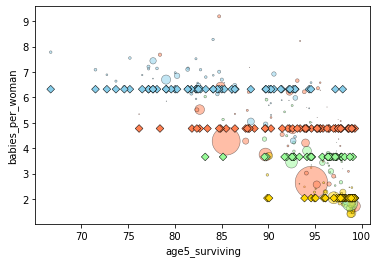

In [73]:
plotfit(modelRegionmeans)

In [74]:
modelRegionmeans.params

region[Africa]     6.321321
region[America]    3.658182
region[Asia]       4.775577
region[Europe]     2.035682
dtype: float64

In [61]:
modelSurvival = smf.ols(formula='babies_per_woman ~ -1 + region + age5_surviving', data=gdata).fit()

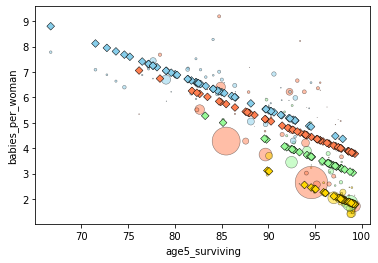

In [62]:
plotfit(modelSurvival)

In [63]:
modelSurvival.params

region[Africa]     18.265792
region[America]    17.085884
region[Asia]       17.864741
region[Europe]     15.872183
age5_surviving     -0.141886
dtype: float64

In [64]:
surviveByRegion = smf.ols(formula='babies_per_woman ~ -1 + region + age5_surviving:region',data=gdata).fit()

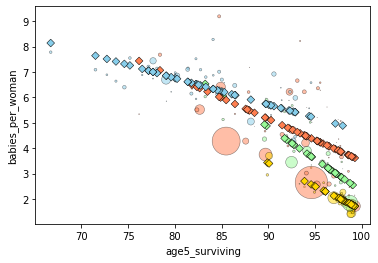

In [65]:
plotfit(surviveByRegion)

In [66]:
surviveByRegionPopulation = smf.ols(formula='babies_per_woman ~ -1 + region + age5_surviving:region + population',data=gdata).fit()

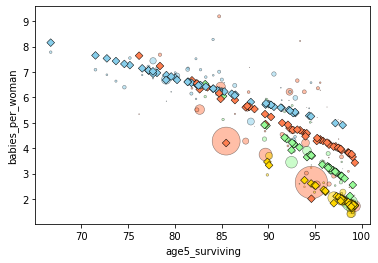

In [67]:
plotfit(surviveByRegionPopulation)

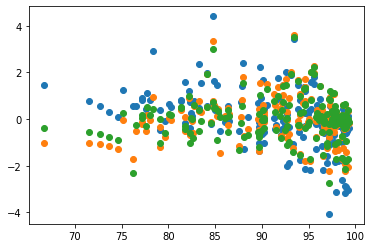

In [76]:
pp.scatter(gdata.age5_surviving, modelRegionmeans.resid)
pp.scatter(gdata.age5_surviving, modelSurvival.resid)
pp.scatter(gdata.age5_surviving, surviveByRegionPopulation.resid)

In [77]:
for model in [modelRegionmeans,modelSurvival,surviveByRegionPopulation]:
    print(model.mse_resid)

1.4979520263709154
0.942302533300832
0.8480227300570343


In [79]:
for model in [modelRegionmeans,modelSurvival,surviveByRegionPopulation]:
    print(model.rsquared)

0.636467696559659
0.7726009080146059
0.7999775707885212


F statistic: gives the explanatory power of fit parameters compared to a random fit vector. F of 1 the parameter is as good as a random vector. 

In [80]:
for model in [modelRegionmeans,modelSurvival,surviveByRegionPopulation]:
    print(model.fvalue)

103.88003937611687
150.34180603430983
86.4878755672516


In [81]:
modelSurvival.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       babies_per_woman   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     150.3
Date:                Thu, 07 Jan 2021   Prob (F-statistic):           8.26e-56
Time:                        14:50:43   Log-Likelihood:                -250.30
No. Observations:                 182   AIC:                             510.6
Df Residuals:                     177   BIC:                             526.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
region[Africa]     18.2658      1.168     15.639      0.000      15.961      20.571
region[America]    17.0859      1.315     12.990      0.000      14.490      19.682
region[Asia]       17.8647      1.279     13.971      0.000      15.341      20.388
region[Europe]     15.8722      1.352     11.739      0.000      13.204      18.541
age5_surviving     -0.1419      0.014    -10.294      0.000      -0.169      -0.115
==============================================================================
Omnibus:                       13.021   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.362
Skew:                           0.443   Prob(JB):                     0.000103
Kurtosis:                       4.279   Cond. No.                     3.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
sm.stats.anova_lm(surviveByRegionPopulation)

,df,sum_sq,mean_sq,F,PR(>F)
region,4.0,3927.702839,981.925710,1157.900225,1.132132e-123
age5_surviving:region,4.0,110.113541,27.528385,32.461848,3.514845e-20
population,1.0,9.813987,9.813987,11.572788,8.313090e-04
Residual,173.0,146.707932,0.848023,NaN,NaN
